In [1]:
import yfinance as yf

tickerSymbol = 'AAPL'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2023-3-8')

In [3]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,72.444306,73.510531,72.187536,73.449394,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,72.666833,73.505624,72.507880,72.735306,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.845179,73.354024,71.590849,73.314896,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,73.324680,73.583898,72.747555,72.970093,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,72.669286,74.449580,72.669286,74.143898,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0


In [2]:
import pandas as pd 
import numpy as np

tickerDf['Close'].head()

Date
2020-01-02 00:00:00-05:00    73.449394
2020-01-03 00:00:00-05:00    72.735306
2020-01-06 00:00:00-05:00    73.314896
2020-01-07 00:00:00-05:00    72.970093
2020-01-08 00:00:00-05:00    74.143898
Name: Close, dtype: float64

In [5]:
tickerDf['SMA50'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['SMA200'] = tickerDf['Close'].rolling(window=200).mean()

tickerDf['Buy'] = np.where(tickerDf['SMA50'] > tickerDf['SMA200'],1,0)
tickerDf['Sell'] = np.where(tickerDf['SMA50'] < tickerDf['SMA200'], 1, 0)

In [6]:
# Calculate the returns
tickerDf['Returns'] = tickerDf['Close'].pct_change()

# Calculate the strategy returns
tickerDf['Strategy'] = tickerDf['Returns'] * tickerDf['Buy'].shift(1) - tickerDf['Returns'] * tickerDf['Sell'].shift(1)

# Calculate the cumulative returns
tickerDf['CumulativeReturns'] = (1 + tickerDf['Strategy']).cumprod()


In [9]:
tickerDf.head(400)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA50,SMA200,Buy,Sell,Returns,Strategy,CumulativeReturns
Date,,,,,,,,,,,,,,
2020-01-02 00:00:00-05:00,72.444306,73.510531,72.187536,73.449394,135480400,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,72.666841,73.505632,72.507887,72.735313,146322800,0.0,0.0,NaN,NaN,0,0,-0.009722,0.000000,1.000000
2020-01-06 00:00:00-05:00,71.845172,73.354016,71.590842,73.314888,118387200,0.0,0.0,NaN,NaN,0,0,0.007968,0.000000,1.000000
2020-01-07 00:00:00-05:00,73.324680,73.583898,72.747555,72.970093,108872000,0.0,0.0,NaN,NaN,0,0,-0.004703,0.000000,1.000000
2020-01-08 00:00:00-05:00,72.669279,74.449573,72.669279,74.143890,132079200,0.0,0.0,NaN,NaN,0,0,0.016086,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28 00:00:00-04:00,143.330686,145.468624,141.083871,143.498947,118931200,0.0,0.0,133.591983,126.650124,1,0,-0.012196,-0.012196,1.206977
2021-07-29 00:00:00-04:00,143.211899,145.052899,143.103022,144.152191,56699500,0.0,0.0,134.003535,126.758257,1,0,0.004552,0.004552,1.212472
2021-07-30 00:00:00-04:00,142.905073,144.835149,142.637827,144.369949,70440600,0.0,0.0,134.422610,126.883730,1,0,0.001511,0.001511,1.214303


In [10]:
# Calculate the total return
totalReturn = tickerDf['CumulativeReturns'][-1]

# Calculate the annualized return
annualizedReturn = ((1 + totalReturn) ** (365 / len(tickerDf))) - 1

# Calculate the annualized volatility
annualizedVolatility = tickerDf['Returns'].std() * np.sqrt(252)

# Calculate the Sharpe ratio
sharpeRatio = (annualizedReturn - 0.02) / annualizedVolatility

# Calculate the maximum drawdown
cumulativeReturns = tickerDf['CumulativeReturns']
peak = cumulativeReturns.cummax()
drawdown = (cumulativeReturns - peak) / peak
maxDrawdown = drawdown.min()


In [11]:
import matplotlib.pyplot as plt

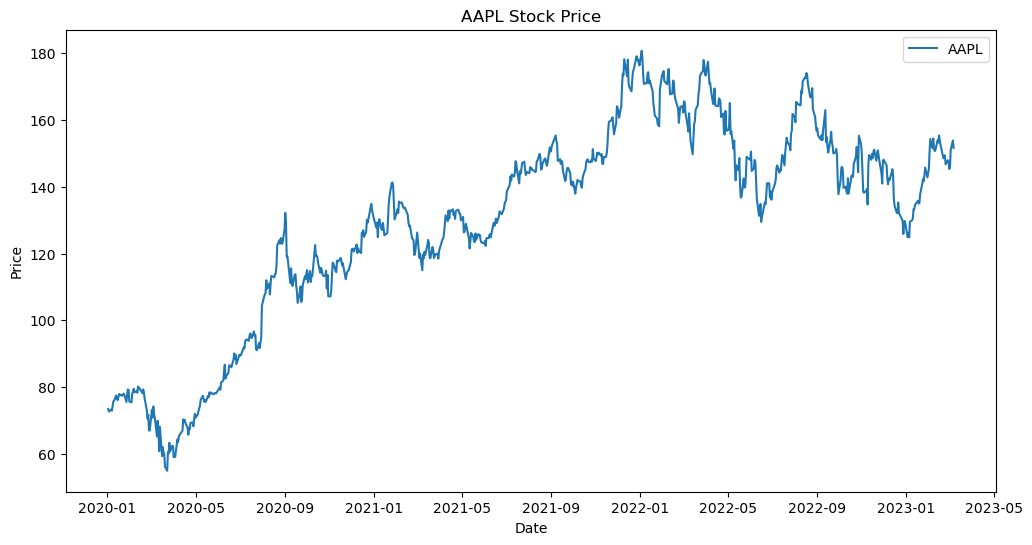

In [15]:
plt.figure(figsize=(12,6))
plt.plot(tickerDf['Close'],label='AAPL')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

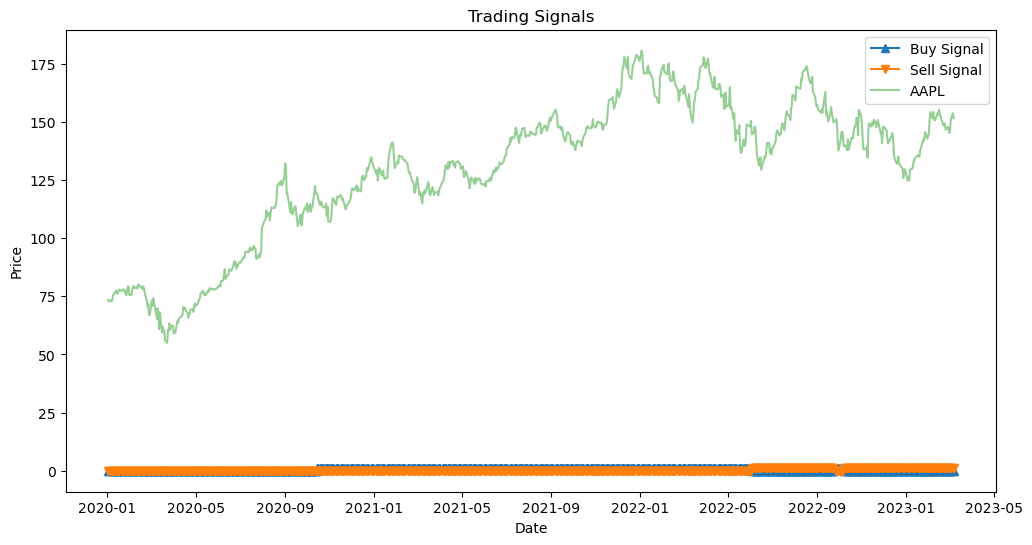

In [32]:
plt.figure(figsize=(12,6))
plt.plot(tickerDf['Buy'],label='Buy Signal',marker='^', alpha=1)
plt.plot(tickerDf['Sell'], label='Sell Signal', marker='v', alpha=1)
plt.plot(tickerDf['Close'], label='AAPL', alpha=0.5)
plt.title('Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

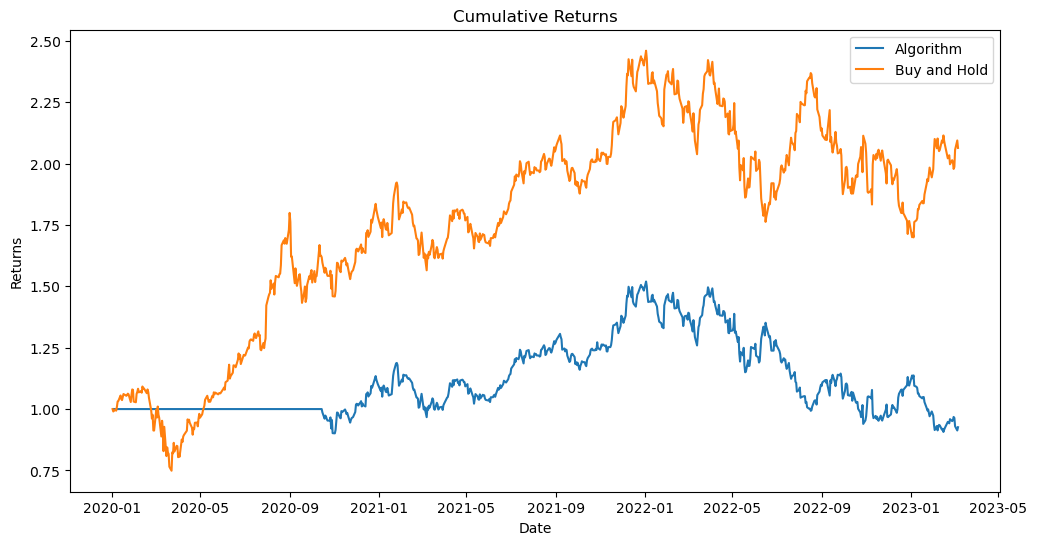

In [33]:
plt.figure(figsize=(12,6))
plt.plot(tickerDf['CumulativeReturns'], label='Algorithm')
plt.plot(tickerDf['Close'] / tickerDf['Close'].iloc[0], label='Buy and Hold')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()